In [0]:
import numpy as np
import math
import networkx as nx
import pandas as pd
import json
from collections import Counter, defaultdict
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
plt.xkcd()
%matplotlib inline
import community

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# read data
targets = pd.read_csv('/content/drive/My Drive/mine/dataset/facebook_2_target.csv')

with open('/content/drive/My Drive/mine/dataset/facebook_2_edges.csv', 'r') as f:
    edges = []
    next(f)
    for line in f:
        u,v = line.strip().split(',')
        edges.append([int(u),int(v)])

features = {int(k) : v for k,v in json.loads(open('/content/drive/My Drive/mine/dataset/facebook_2_features.json').read()).items()}

n_edges = len(edges)
n_features = len(features)
n_targets = len(targets)

In [0]:
# create graph
G = nx.Graph()

# add nodes
G.add_nodes_from(np.arange(n_features,dtype = 'int'))
# add edges
G.add_edges_from(edges)

# add properties
for i, row in targets.iterrows():
    G.nodes[row['id']]['facebook_id'] = row['facebook_id']
    G.nodes[row['id']]['page_name'] = row['page_name']
    G.nodes[row['id']]['page_type'] = row['page_type']



*   There are 22470 nodes with property page_type and 171002 edges between them in the graph.
*   All nodes belong to four categories: politicians, governmental organizations, television shows and companies.




In [24]:
# degree
degree_list = nx.degree(G)

degree_value_list = [i[1] for i in degree_list]
print('Mean Degree: {}.'.format(round(np.mean(degree_value_list),2)))

degree_count_dict = Counter(degree_value_list)
for i in sorted_degree_count_list[0:10]:
  print("The number of degree {} is {}.".format(i[0], i[1]))

degree_stats = pd.DataFrame(zip([1,10,25,50,75,90,99,100], np.percentile(degree_value_list, [1,10,25,50,75,90,99,100])),
                 columns=['Percentile','Value'])
print(degree_stats)

Mean Degree: 15.22.
The number of degree 1 is 2658.
The number of degree 2 is 2307.
The number of degree 3 is 1843.
The number of degree 4 is 1516.
The number of degree 5 is 1359.
The number of degree 6 is 1114.
The number of degree 7 is 974.
The number of degree 8 is 811.
The number of degree 9 is 731.
The number of degree 10 is 618.
   Percentile   Value
0           1    1.00
1          10    1.00
2          25    3.00
3          50    7.00
4          75   17.00
5          90   36.00
6          99  114.31
7         100  709.00


findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


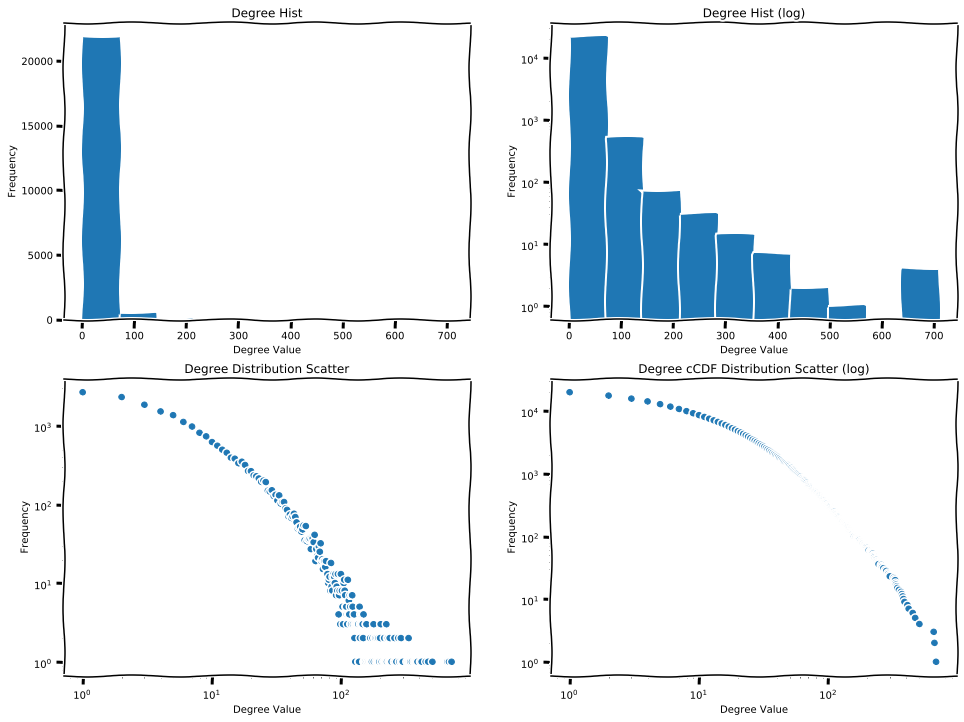

In [7]:
# degree plot
figsize(16, 12)

plt.subplot(2, 2, 1)
plt.title("Degree Hist")
plt.xlabel("Degree Value")
plt.ylabel("Frequency")
plt.hist(degree_value_list)

plt.subplot(2, 2, 2)
plt.title("Degree Hist (log)")
plt.xlabel("Degree Value")
plt.ylabel("Frequency")
plt.hist(degree_value_list, log=True)

plt.subplot(2, 2, 3)
plt.xlabel("Degree Value")
plt.ylabel("Frequency")
plt.title("Degree Distribution Scatter")
plt.loglog(np.array(sorted_degree_count_list)[:, 0],
      np.array(sorted_degree_count_list)[:, 1],
      linestyle='',
      marker='.',
      markersize=10,
      alpha=1.0,
      label=None)

plt.subplot(2, 2, 4)
plt.xlabel("Degree Value")
plt.ylabel("Frequency")
plt.title("Degree cCDF Distribution Scatter (log)")
CDF = np.array(sorted_degree_count_list)[:,1].cumsum()
cCDF = CDF[-1] - CDF
plt.loglog(np.array(sorted_degree_count_list)[:, 0],
      cCDF,
      linestyle='',
      marker='.',
      markersize=10,
      alpha=1.0,
      label=None)

plt.show()



*   绝大部分的用户度都在114以下。
*   度分布服从幂律分布。



In [25]:
# degree draw
degree_node_without1_list = []
for i in degree_list:
  if i[1] > 400:
    degree_node_without1_list.append(i[0])
print(len(degree_node_without1_list))

# G1 = G.subgraph(degree_node_without1_list)
# nx.draw(G1)

9




*   根据度绘图比较困难



In [0]:
# closeness centrality
closeness_dict = nx.closeness_centrality(G)
# print(closeness_centrality)



*   由于需要计算最短路径，临近中心性计算相当耗时。



In [40]:
# betweenness centrality
# betweenness_dict = nx.betweenness_centrality(G)
node_list_without1 = [i[0] for i in degree_list if i[1]>1]
G1 = G.subgraph(node_list_without1)
# k_valule = int(np.log10(len(node_list_without1)) / pow(np.e, 2))
betweenness_dict = nx.betweenness_centrality(G1, k=200)
print(betweenness_dict)

{1: 0.00015839952113923608, 2: 1.9371837860431932e-05, 3: 0.00018499264238295738, 4: 0.00010173596380656777, 5: 3.517332551099827e-05, 6: 1.0628884450234768e-05, 7: 0.0, 8: 7.0125576520037554e-06, 9: 0.0, 10: 0.0, 11: 5.648761112598688e-07, 12: 5.156801364592313e-05, 13: 1.7329462139837557e-05, 14: 5.274581977938911e-05, 15: 4.561577342909586e-07, 17: 3.7711384534320624e-06, 18: 3.888487450736272e-06, 19: 0.0005396028254243319, 21: 5.04821038368361e-05, 22: 0.0001422077174532712, 23: 1.4073798645420975e-07, 24: 1.5170373899206595e-05, 25: 4.397641026081614e-05, 26: 8.29686309722221e-08, 27: 5.173566653586906e-05, 28: 5.178852375440509e-07, 29: 0.00010226074301590098, 30: 0.00015266645472027148, 31: 4.491780088338583e-06, 32: 0.0006629475954261516, 33: 0.0, 34: 9.982264669356906e-08, 35: 3.317054243224868e-05, 36: 4.657741482210804e-05, 37: 5.588536139545031e-05, 38: 1.8661567151476627e-05, 39: 0.00016059175026870295, 40: 0.0, 41: 0.0003387337652538778, 42: 7.699444175404342e-06, 43: 4.



*   计算中介中心性同样十分耗时。
*   计算中介中心性可以指定参数*k*，进行采样计算。作为中介点，度至少为2，首先删除度为1的节点，然后按照公式*log*10(*N*)/*e*^2计算*k*。



**以上中心度计算由于节点过多，运算时间长，而且难以看出规律。**

In [39]:
# connected components
components = list(nx.connected_components(G))
print('Components count: {}'.format(len(components)))
component_sizes = {i:len(comp) for i,comp in enumerate(components)}
for k, v in component_sizes.items():
    print('Component {} has size: {}'.format(k, v))

Components count: 1
Component 0 has size: 22470



*   图中只有一个连接组件，所有节点之间全部互相可达。


In [8]:
partition = community.best_partition(G)
print(partition)

{0: 0, 1: 1, 2: 2, 3: 0, 4: 3, 5: 3, 6: 4, 7: 5, 8: 6, 9: 1, 10: 1, 11: 5, 12: 7, 13: 3, 14: 1, 15: 8, 16: 9, 17: 10, 18: 1, 19: 9, 20: 11, 21: 12, 22: 13, 23: 7, 24: 14, 25: 15, 26: 16, 27: 9, 28: 12, 29: 12, 30: 9, 31: 8, 32: 17, 33: 18, 34: 19, 35: 9, 36: 9, 37: 16, 38: 6, 39: 16, 40: 20, 41: 21, 42: 9, 43: 1, 44: 22, 45: 21, 46: 5, 47: 4, 48: 12, 49: 14, 50: 16, 51: 13, 52: 2, 53: 23, 54: 8, 55: 19, 56: 16, 57: 9, 58: 16, 59: 18, 60: 4, 61: 24, 62: 21, 63: 12, 64: 11, 65: 9, 66: 9, 67: 3, 68: 25, 69: 26, 70: 9, 71: 19, 72: 6, 73: 19, 74: 27, 75: 1, 76: 23, 77: 13, 78: 15, 79: 22, 80: 27, 81: 17, 82: 3, 83: 15, 84: 1, 85: 28, 86: 25, 87: 4, 88: 1, 89: 29, 90: 1, 91: 9, 92: 12, 93: 5, 94: 1, 95: 30, 96: 9, 97: 3, 98: 4, 99: 19, 100: 11, 101: 22, 102: 0, 103: 20, 104: 8, 105: 4, 106: 3, 107: 24, 108: 31, 109: 13, 110: 27, 111: 9, 112: 1, 113: 3, 114: 11, 115: 9, 116: 8, 117: 9, 118: 13, 119: 0, 120: 17, 121: 16, 122: 21, 123: 1, 124: 9, 125: 9, 126: 2, 127: 1, 128: 9, 129: 18, 130: 1,

**选择最大的连接组件这条路也不通了。**

**图方法暂时没有思路。**

In [41]:
print(nx.assortativity.attribute_assortativity_coefficient(G,'page_type'))

0.8207604936489163


**pagetype属性具有比较强的可分类性，考虑机器学习方法。**

In [0]:
nei_type = [[n, G.nodes[nei]['page_type']] for n in G.nodes() for nei in G.neighbors(n)]
node_neiType = pd.DataFrame(np.array(nei_type), columns=['node', 'nei_type']).pivot_table(index='node', columns='nei_type', values = 'node', aggfunc = lambda x:len(x)).fillna(0).reset_index()
node_neiType.node = node_neiType.node.astype('int64')
node_neiType.columns = ['node', 'company', 'government', 'politician', 'tvshow']
node_neiType = node_neiType.merge(pd.DataFrame(G.degree(), columns = ['node','degree']),on = 'node',how = 'inner').merge(targets[['id','page_type']],left_on = 'node',right_on = 'id',how = 'inner')
node_neiType.drop('id',axis = 1,inplace = True)
targets = pd.get_dummies(node_neiType.page_type)

In [0]:
X = node_neiType[['company','government','politician','tvshow','degree']].values
Y = targets.values

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,Y)
lr = OneVsRestClassifier(LogisticRegression())
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
preds = lr.predict(X_test)
preds = np.argmax(preds, axis=1)
ground_true = np.argmax(y_test, axis=1)

In [51]:
print(accuracy_score(ground_true, preds))
print(classification_report(ground_true, preds))

0.9104663581345674
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1587
           1       0.97      0.87      0.92      1745
           2       0.96      0.92      0.94      1471
           3       0.94      0.88      0.91       815

    accuracy                           0.91      5618
   macro avg       0.92      0.91      0.91      5618
weighted avg       0.92      0.91      0.91      5618



**机器学习取得了相对较高的准确率。**